In [3]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# computer vision library
import cv2

#glob

from glob import glob

In [4]:
#extract path of female and male from crop_data folder
fpath=glob(r'C:\Users\dell\Desktop\Minor_project_facerec\face\2_Train_FaceRecognition_with_ML\crop_data\female\*.jpg')
mpath=glob(r'C:\Users\dell\Desktop\Minor_project_facerec\face\2_Train_FaceRecognition_with_ML\crop_data\male\*.jpg')

In [5]:
print("The number of images in female path =",len(fpath))
print("The number of images in male path =",len(mpath))

The number of images in female path = 2586
The number of images in male path = 2175


In [13]:
df_female=pd.DataFrame(fpath,columns=['filepath'])
df_female['gender']='female'

df_male=pd.DataFrame(mpath,columns=['filepath'])
df_male['gender']='male'

df=pd.concat((df_female,df_male),axis=0)
df.head()

,filepath,gender
0,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female
1,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female
2,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female
3,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female
4,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female


In [14]:
df.tail()

,filepath,gender
2170,C:\Users\dell\Desktop\Minor_project_facerec\fa...,male
2171,C:\Users\dell\Desktop\Minor_project_facerec\fa...,male
2172,C:\Users\dell\Desktop\Minor_project_facerec\fa...,male
2173,C:\Users\dell\Desktop\Minor_project_facerec\fa...,male
2174,C:\Users\dell\Desktop\Minor_project_facerec\fa...,male


In [15]:
df.shape

(4761, 2)

In [30]:
# it wil take each image path
# then return width of the image
def get_size(path):
    img=cv2.imread(path)
    return img.shape[0]


In [31]:
df['dimension']=df['filepath'].apply(get_size) #store dimension of image in the columns

In [32]:
df.head()

,filepath,gender,dimension
0,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female,273
1,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female,273
2,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female,122
3,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female,122
4,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female,182


In [33]:
dist_gender=df['gender'].value_counts()
dist_gender


gender
female    2586
male      2175
Name: count, dtype: int64

<Axes: ylabel='count'>

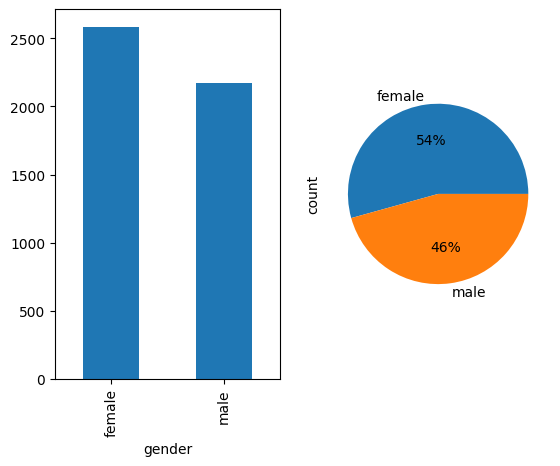

In [34]:
fig,ax=plt.subplots(1,2)
dist_gender.plot(kind='bar',ax=ax[0])
dist_gender.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')

<Axes: xlabel='dimension', ylabel='Count'>

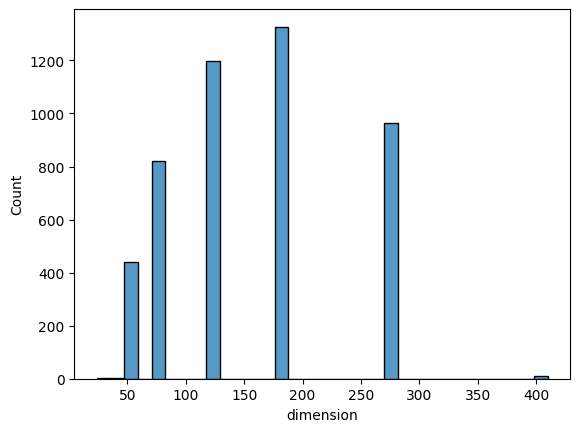

In [39]:
dist_size=df['dimension'].value_counts()
dist_size
sns.histplot(df['dimension'])

<Axes: ylabel='count'>

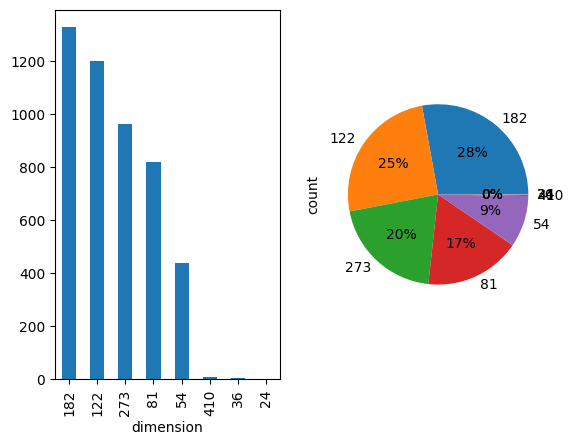

In [40]:
fig,ax=plt.subplots(1,2)
dist_size.plot(kind='bar',ax=ax[0])
dist_size.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')

C:\Users\dell\AppData\Local\Temp\ipykernel_15348\510504429.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='gender', y='dimension',kind='box', palette={'male': 'black', 'female': 'lightpink'})


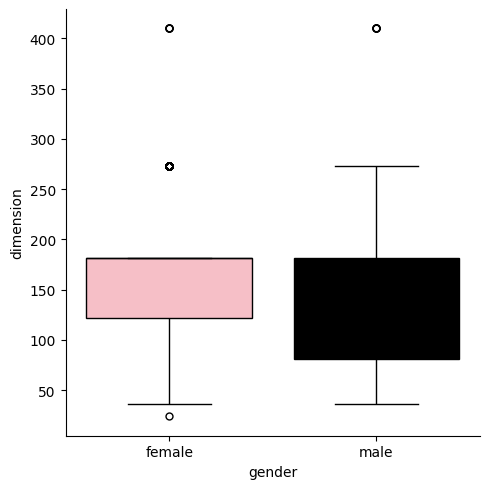

In [48]:
sns.catplot(data=df, x='gender', y='dimension',kind='box', palette={'male': 'black', 'female': 'lightpink'})

### Consider the images with more than60** and resize the image to 100*100

In [49]:
df_filter=df.query('dimension>60')
df_filter.shape

(4317, 3)

In [52]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.552699
male      0.447301
Name: proportion, dtype: float64

### Structure the images to 100x100

In [56]:
def structuring(path):
    try:
        img=cv2.imread(path)
        gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # resize the imgage 100x100
        size=gray_img.shape[0]
        if size>=100:
            gray_resize=cv2.resize(gray_img,(100,100), cv2.INTER_AREA)
        else:
            gray_resize=cv2.resize(gray_img,(100,100), cv2.INTER_CUBIC)

        fatten_image=gray_resize.flatten()
        return fatten_image     
    except:
         return None

In [58]:
df_filter.loc[:, 'data']=df_filter['filepath'].apply(structuring)

In [59]:
df_filter.head()

,filepath,gender,dimension,data
0,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female,273,"[200, 189, 188, 181, 184, 185, 179, 176, 189, ..."
1,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female,273,"[234, 236, 235, 241, 198, 186, 114, 16, 45, 35..."
2,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female,122,"[49, 49, 35, 34, 42, 40, 35, 39, 71, 62, 46, 4..."
3,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female,122,"[137, 128, 114, 96, 96, 95, 93, 114, 150, 163,..."
4,C:\Users\dell\Desktop\Minor_project_facerec\fa...,female,182,"[234, 236, 231, 231, 231, 185, 142, 111, 52, 4..."


In [61]:
data=df_filter['data'].apply(pd.Series)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,200,189,188,181,184,185,179,176,189,180,...,109,106,108,111,113,115,120,117,118,122
1,234,236,235,241,198,186,114,16,45,35,...,21,18,18,17,21,29,23,31,40,38
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,137,128,114,96,96,95,93,114,150,163,...,66,53,68,67,74,92,97,103,102,96
4,234,236,231,231,231,185,142,111,52,45,...,241,240,236,237,239,237,237,242,241,241


In [62]:
data.columns=[f"pixel_{i}" for i in data.columns]

In [63]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,200,189,188,181,184,185,179,176,189,180,...,109,106,108,111,113,115,120,117,118,122
1,234,236,235,241,198,186,114,16,45,35,...,21,18,18,17,21,29,23,31,40,38
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,137,128,114,96,96,95,93,114,150,163,...,66,53,68,67,74,92,97,103,102,96
4,234,236,231,231,231,185,142,111,52,45,...,241,240,236,237,239,237,237,242,241,241


### DATA NORMALIZATION

In [65]:
data=data/255.0

In [67]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.427451,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431
1,0.917647,0.925490,0.921569,0.945098,0.776471,0.729412,0.447059,0.062745,0.176471,0.137255,...,0.082353,0.070588,0.070588,0.066667,0.082353,0.113725,0.090196,0.121569,0.156863,0.149020
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.823529,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.258824,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.945098,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098


In [70]:
data['gender']=df_filter['gender']
data.tail()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
2168,0.470588,0.372549,0.431373,0.329412,0.396078,0.600000,0.447059,0.568627,0.631373,0.643137,...,0.458824,0.486275,0.494118,0.509804,0.537255,0.537255,0.525490,0.482353,0.439216,male
2170,0.062745,0.070588,0.066667,0.062745,0.066667,0.062745,0.054902,0.058824,0.062745,0.074510,...,0.898039,0.909804,0.913725,0.917647,0.921569,0.921569,0.917647,0.913725,0.909804,male
2172,0.694118,0.701961,0.705882,0.709804,0.709804,0.713725,0.717647,0.717647,0.709804,0.705882,...,0.560784,0.552941,0.537255,0.545098,0.564706,0.592157,0.619608,0.650980,0.674510,male
2173,0.145098,0.145098,0.145098,0.145098,0.149020,0.156863,0.156863,0.152941,0.152941,0.152941,...,0.160784,0.172549,0.188235,0.211765,0.239216,0.262745,0.278431,0.282353,0.278431,male
2174,0.713725,0.717647,0.721569,0.721569,0.717647,0.725490,0.721569,0.721569,0.725490,0.721569,...,0.643137,0.682353,0.741176,0.745098,0.749020,0.745098,0.745098,0.745098,0.745098,male


In [74]:
data.isnull().sum().sum()

np.int64(0)

### remove the missing value

In [75]:
data.dropna(inplace=True)

In [76]:
data.shape

(4317, 10001)

Save the data

In [80]:
import pickle
pickle.dump(data,open(r'C:\Users\dell\Desktop\Minor_project_facerec\face\2_Train_FaceRecognition_with_ML\data/data_images_100_100.pickle',mode='wb'))